In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline
from pybrain.tools.shortcuts import buildNetwork
from pybrain.tools.shortcuts import SigmoidLayer
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
def get_err_in_percent(net,ds):
    h=net.activateOnDataset(ds)
    return 100-sum(h.argmax(axis=1)==ds['target'].argmax(axis=1))/float(ds['target'].shape[0])*100

In [2]:
small_train_ds=SupervisedDataSet.loadFromFile('small_train_ds_8X6X3')
small_test_ds=SupervisedDataSet.loadFromFile('small_test_ds_8X6X3')

In [3]:
small_nets=[]
small_err=[]
min_small_err=[]
for k in range(51,101):
    print k
    small_net=buildNetwork(144,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    small_trainer=BackpropTrainer(small_net,small_train_ds)
    small_err.append(small_trainer.trainUntilConvergence(maxEpochs=5000,continueEpochs=500,validationProportion=1/3.0))
    small_nets.append(small_net)

for e in small_err:
    min_small_err.append(min(e[1]))    
small_idx=min_small_err.index(min(min_small_err))

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


47 0.051513713386


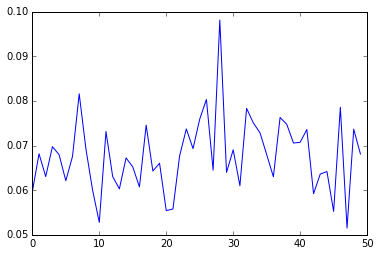

In [4]:
plt.plot(min_small_err)
print small_idx,(min_small_err[small_idx])

In [9]:
small_train_result=get_err_in_percent(small_nets[small_idx],small_train_ds)
small_train_result

24.666666666666671

In [10]:
small_test_result=get_err_in_percent(small_nets[small_idx],small_test_ds)
small_test_result

43.000000000000007

In [19]:
small_net=small_nets[7]

In [20]:
import pickle

In [21]:
f=open('small_net_2X2X3+12X3_v6.net', 'w')
pickle.dump(small_net,f)
f.close()